# 01 Data Collection & Cleaning

## Import libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read the Datasets

- In the 'train.csv' dataset, there are 82 data columns, with 81 features that I can use to predict 'SalePrice'.
- In the 'test.csv' dataset, there are only 81 data columns, which are the features without "SalePrice" data.
- The train dataset will be used to train and cross validate the regression models.
- The 'test.csv' dataset will be used to generate "SalePrice" predictions for the kaggle competition later.

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

- The data columns are a mix of int64, float64, and object datatypes.
- If selected to be features, the 'object' type columns will need to be encoded.
- Observations count: 1538 for 'train' set, and '513' for test set, which is about a 75% train / 25% test breakdown.
- There are missing values in several data columns.

In [3]:
print(train.shape)
print(test.shape)

(1538, 82)
(513, 81)


In [4]:
train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,532,1612,526352080,20,RL,85.0,10667,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2007,WD,167300
1,415,2045,904100100,70,RL,107.0,12888,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,219000
2,273,1962,535451110,20,RL,60.0,7200,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,129000
3,1460,229,905109130,60,RL,80.0,14000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,328000
4,250,1105,528363020,60,RL,NaN,11929,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2008,WD,290000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1538 non-null   int64  
 1   Id               1538 non-null   int64  
 2   PID              1538 non-null   int64  
 3   MS SubClass      1538 non-null   int64  
 4   MS Zoning        1538 non-null   object 
 5   Lot Frontage     1285 non-null   float64
 6   Lot Area         1538 non-null   int64  
 7   Street           1538 non-null   object 
 8   Alley            111 non-null    object 
 9   Lot Shape        1538 non-null   object 
 10  Land Contour     1538 non-null   object 
 11  Utilities        1538 non-null   object 
 12  Lot Config       1538 non-null   object 
 13  Land Slope       1538 non-null   object 
 14  Neighborhood     1538 non-null   object 
 15  Condition 1      1538 non-null   object 
 16  Condition 2      1538 non-null   object 
 17  Bldg Type     

- Identify which data columns are numeric types ('int64' or 'float64') and which columns are nominal and ordinal types ('object').
- In later steps, I researched the 'object' data types in DataDocumentation.txt to know which features are nominal and which features are ordinal.

In [6]:
# list of string object features 
train_object_features = train.select_dtypes(include='object').columns
train_object_features

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [7]:
# list of numeric features 
train_numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
train_numeric_features

Index(['Unnamed: 0', 'Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

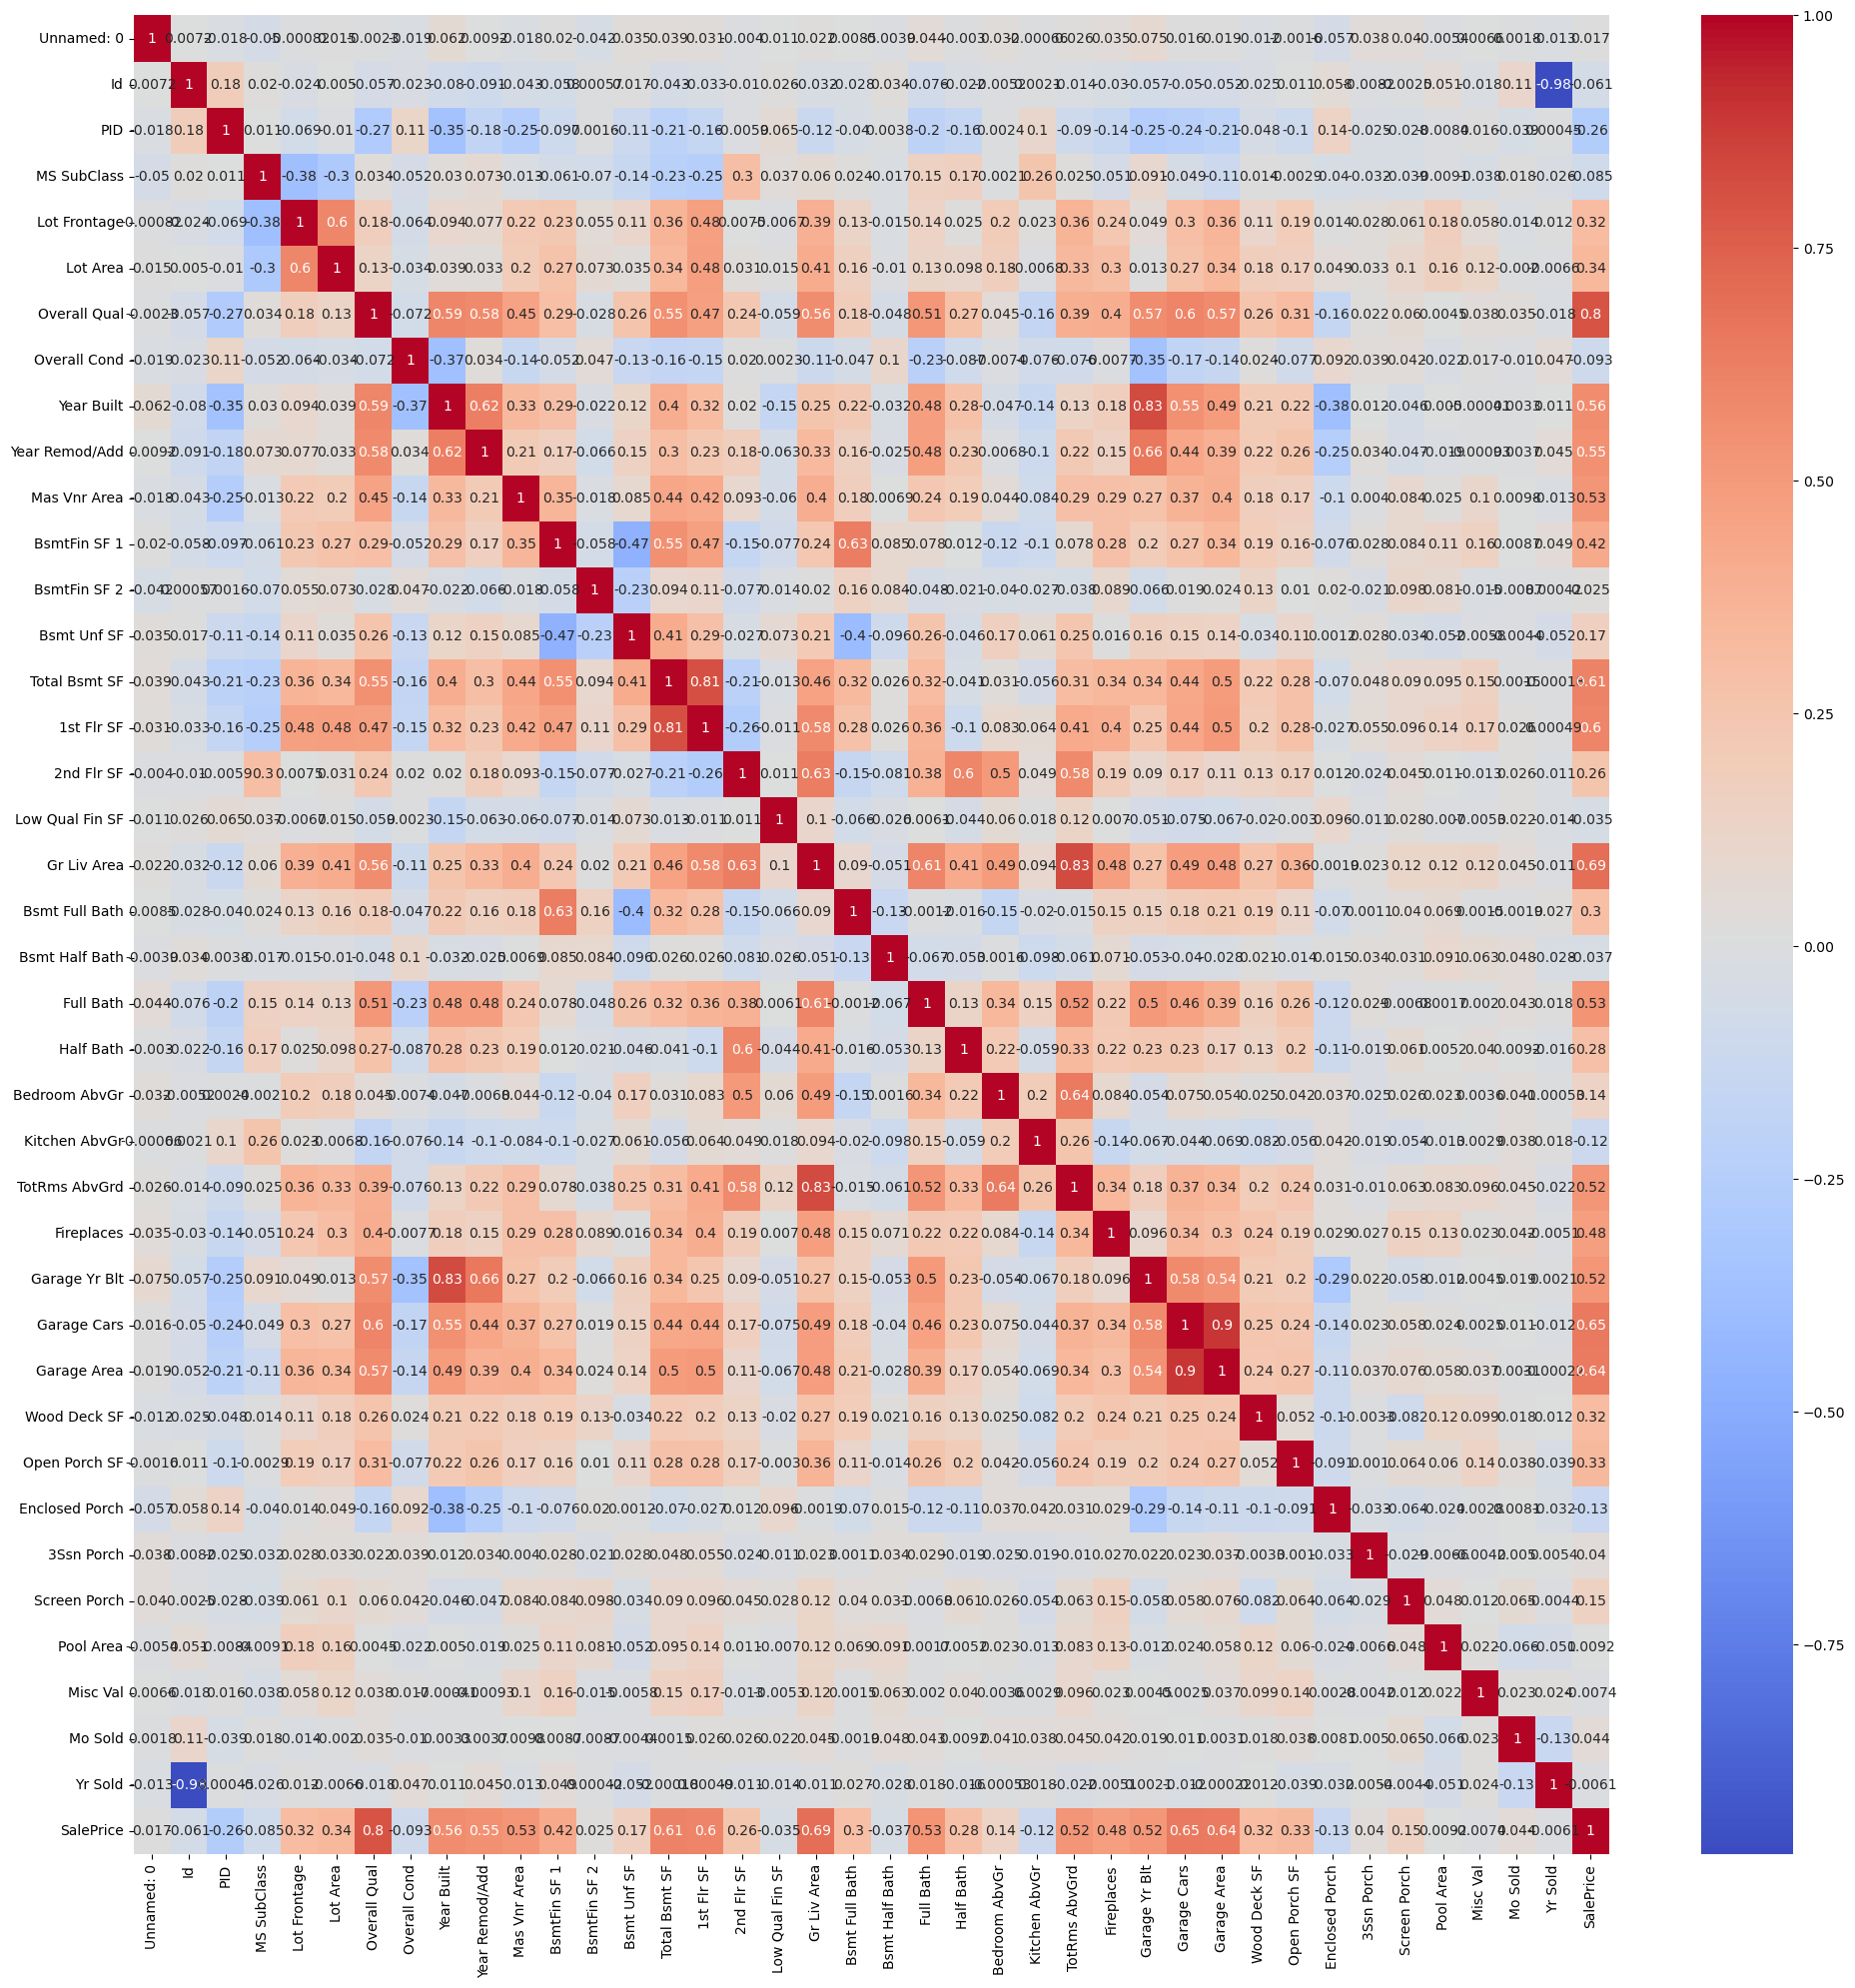

In [8]:
# THERE ARE DATA COLUMNS WITH OBJECTS THAT WILL NEED TO BE TRANFORMED
# BUT FOR NOW LET'S ASSUMED THAT WE ARE ONLY WORKING WITH INT OR FLOAT FEATURES!
# - Select the features that I think would make the BEST predictor model
# - But which features? Maybe by the number of rows, or heat map,

plt.figure(figsize = (20,20))
train_numeric_features = train.select_dtypes(exclude=[object])
sns.heatmap(train_numeric_features.corr(), cmap='coolwarm', annot = True)
plt.tight_layout()

In [9]:
# BASED ON THIS MAP IT SEEMS LIKE WE CAN GET RID OF SOME FEATURES
# BUT IF WE GET RID OF NEGATIVE FEATURES, WOULD IT STILL BE A GOOD MODEL??
# PLOT A HISTOGRAM OF PRICES TO SEE THE SPREADS
# - train_numeric_features
correlations_numeric_features = train_numeric_features.corr()['SalePrice'].sort_values()
selected_numeric_features = correlations_numeric_features[correlations_numeric_features > 0.2].index.tolist()
# selected_numeric_features
correlations_numeric_features

PID               -0.262649
Enclosed Porch    -0.128597
Kitchen AbvGr     -0.117664
Overall Cond      -0.093388
MS SubClass       -0.085096
Id                -0.061303
Bsmt Half Bath    -0.036941
Low Qual Fin SF   -0.035269
Misc Val          -0.007364
Yr Sold           -0.006141
Pool Area          0.009242
Unnamed: 0         0.017101
BsmtFin SF 2       0.025028
3Ssn Porch         0.039846
Mo Sold            0.043508
Bedroom AbvGr      0.137310
Screen Porch       0.148506
Bsmt Unf SF        0.169694
2nd Flr SF         0.258613
Half Bath          0.283577
Bsmt Full Bath     0.296774
Wood Deck SF       0.315844
Lot Frontage       0.318364
Open Porch SF      0.333320
Lot Area           0.339062
BsmtFin SF 1       0.424945
Fireplaces         0.478415
Garage Yr Blt      0.521041
TotRms AbvGrd      0.523055
Mas Vnr Area       0.525619
Full Bath          0.534629
Year Remod/Add     0.546412
Year Built         0.561116
1st Flr SF         0.600088
Total Bsmt SF      0.613353
Garage Area        0

## Removing Outliers

"Gr Liv Area" and "SalePrice" are positively correlated,  but there are 2 outliers where the "Gr Liv Area" is above 5000 sqft but the SalePrice is lower than average.

In [10]:
plt.style.use('bmh')

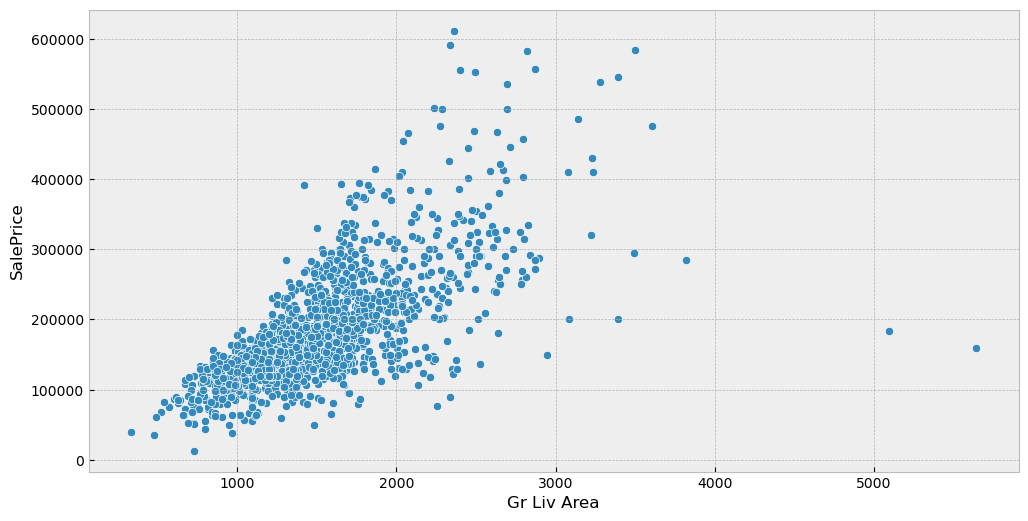

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=train)
plt.savefig('GrLivArea_outlier.png', dpi=300)

In [12]:
# find the index of the points we wanna drop:
drop_rows_LivArea_outliers = train[(train['Gr Liv Area']>5000) & (train['SalePrice']<200000)].index
#remove the 2 outlier rows:
train = train.drop(drop_rows_LivArea_outliers, axis =0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

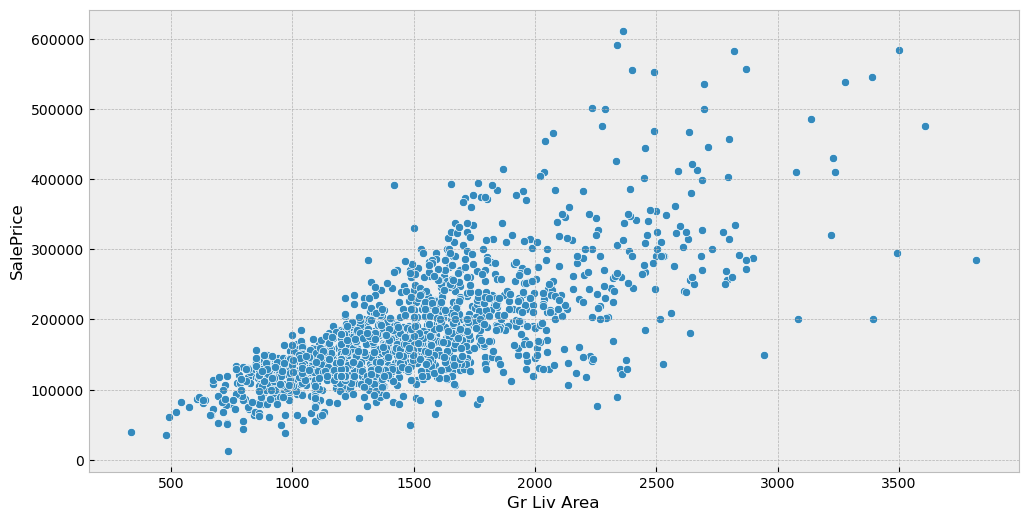

In [13]:
#confirm that the 
plt.figure(figsize=(12,6))
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=train)

## Identify Missing Data

- 'Unnamed: 0', 'Id' and 'PID' are observation/row identifiers so we do not need to include them as features.
- Find missing data (NaN values) for each features and visualize in a percentage barplot.

In [14]:
train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,532,1612,526352080,20,RL,85.0,10667,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2007,WD,167300
1,415,2045,904100100,70,RL,107.0,12888,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,219000
2,273,1962,535451110,20,RL,60.0,7200,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,129000
3,1460,229,905109130,60,RL,80.0,14000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,328000
4,250,1105,528363020,60,RL,NaN,11929,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2008,WD,290000


In [15]:
#drop 'Unnamed: 0', 'Id' and 'PID' 
train = train.drop(columns = ['Unnamed: 0', 'Id', 'PID'])
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,20,RL,85.0,10667,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2007,WD,167300
1,70,RL,107.0,12888,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2007,WD,219000
2,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2007,WD,129000
3,60,RL,80.0,14000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,328000
4,60,RL,NaN,11929,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2008,WD,290000


- Identify data columns with nulls, find the percentage of missing data in each column, and sort them in descending order.

In [16]:
percent_nan = 100 * train.isnull().sum() /len(train)
percent_nan = percent_nan[percent_nan > 0].sort_values(ascending = False)
percent_nan

Pool QC           99.609375
Misc Feature      96.549479
Alley             92.773438
Fence             79.622396
Mas Vnr Type      60.611979
Fireplace Qu      49.804688
Lot Frontage      16.471354
Garage Type        5.729167
Garage Cond        5.729167
Garage Qual        5.729167
Garage Finish      5.729167
Garage Yr Blt      5.729167
Bsmt Exposure      2.799479
BsmtFin Type 2     2.669271
BsmtFin Type 1     2.604167
Bsmt Qual          2.604167
Bsmt Cond          2.604167
Mas Vnr Area       1.171875
Bsmt Half Bath     0.130208
Bsmt Full Bath     0.130208
BsmtFin SF 1       0.065104
Bsmt Unf SF        0.065104
BsmtFin SF 2       0.065104
Total Bsmt SF      0.065104
dtype: float64

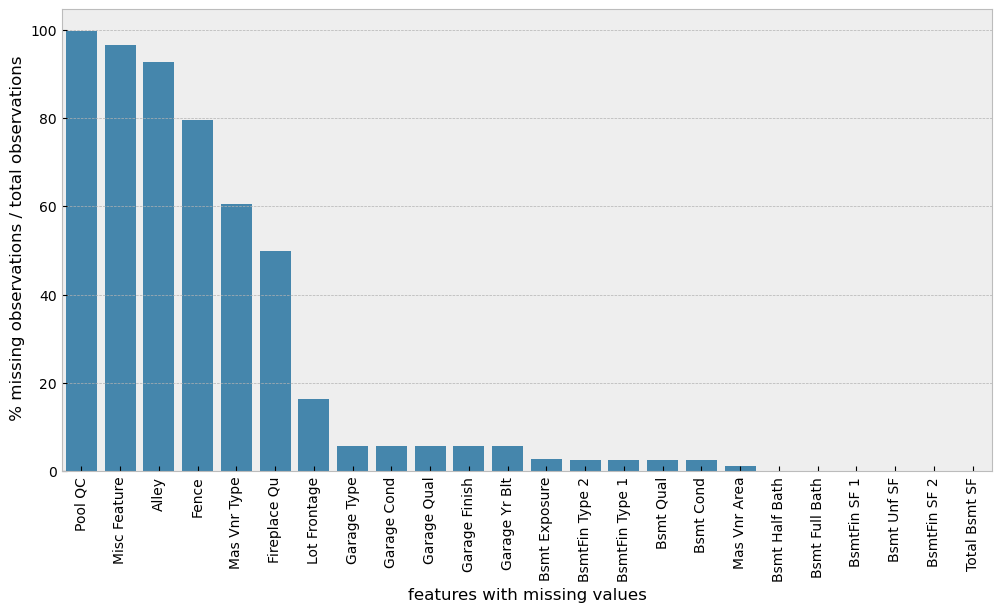

In [17]:
#plot the features with NaN values
plt.figure(figsize=(12,6))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.xlabel("features with missing values")
plt.ylabel(' % missing observations / total observations')
# plt.ylim(0,1)
plt.savefig('Features_with_Nulls.png', dpi=300)

- there are 24 data columns with missing values.
- The features on the left contain mostly missing values and the features on the right have only a few missing values.
- The features with mostly missing values are not good candidates to build a regression model with.
- at this point, I use an iterative process to research potential key features from DataDocumentation.txt and try to avoid the ones with mostly missing data here.


## Fill in Missing Data

- I can reasonably fill in the missing data fields with 0 or a statistic value like mean.
- For example, based on the [Data Documention]('https://jse.amstat.org/v19n3/decock/DataDocumentation.txt'), I can interpret the missing values as:
- "Mas Vnr Type" records the masonry veneer type (nominal), and one of the options is "None". 
- some houses do not have a garage, and I assume that the missing data here can be filled with "No Garage".
- I can assume that rows with missing values in 'Garage Type', 'Garage Yr Blt', 'GarageFinish', 'GarageQual', 'GarageCond' are for houses with no garage.
- 'Garage Yr Blt' is discrete numeric data type, so instead of "No Garage", I can fill in the nulls with 0.

In [18]:
#NUMERIC BASEMENT FEATURES, fill with 0:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
train[bsmt_num_cols] = train[bsmt_num_cols].fillna(0)

In [19]:
#STRING BASEMENT FEATURES:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
train[bsmt_str_cols] = train[bsmt_str_cols].fillna('None')

In [20]:
# reasonable to fill missing data in 'Mas Vnr Area' with 0
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)

In [21]:
train['Mas Vnr Type'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [22]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna("None")

In [23]:
train['Garage Type'].unique()

array(['Attchd', 'Detchd', nan, 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [24]:
# Fill in the categorical garage data with "No Garage"
train[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']] = train[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('No Garage')

In [25]:
# to treat nulls in 'Garage Yr Blt', fillna() with 0, or with the average year built, or with KNN:
#for now I will fillna() with 0:
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(0)

#### "Lot Frontage" imputation

- I assume that "Lot Frontage" in square feet is a feature that is dependent on the 'neighborhood' that the house is in.
- So for the missing values in "Lot Frontage", I fill them with the average "Lot Frontage" in the neighborhood that the house is located in.

In [26]:
#go through the dataframe, and if there is a missing value in "Lot Frontage", fill in with the mean of "Lot Frontage" that is groupby "Neighborhood"
train['Lot Frontage'] = train.groupby("Neighborhood")['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))

#### Engineer 2 New Features

- Based on the Data Documentation, I assume that I can combine numeric features that are related to the deck or porch size into one feature, 'porch_dec_sqft'.
- Similarly, 'all_baths_count' is a sum of all the full baths and half baths in the house.
- This is done to cut down the number of features in the model

In [27]:
#create a 'porch_deck_sqft' feature
train['porch_deck_sqft'] = train['Wood Deck SF'] + train['Open Porch SF'] + train['Enclosed Porch'] + train['Screen Porch'] + train['3Ssn Porch']

# create a 'all_baths_count' feature
train['all_baths_count'] = train['Bsmt Full Bath'] + train['Bsmt Half Bath'] + train['Half Bath'] + train['Full Bath']

## Preprocessing Function

- Data cleaning (remove outliers, fill in nulls, drop rows, etc..) is an iterative process that I have to apply to both "train.csv" and "test.csv" sets.
- To simplify this process, I wrote a function to easily apply these steps to both data sets.
- The numeric, ordinal, and nominal features are selected based on DataDocumentation.txt and previous data analysis steps.

In [81]:
def preprocessing(df):
    ''' This function takes in a dataframe containing the Ames Housing dataset and preprocess it for regression models.'''

    #There are 2 outliers identified in EDA based on scatterplot of 'Gr Liv Area' vs. "SalePrice".
    #Drop these outliers
    drop_rows_GrLivArea_outliers = df[(df['Gr Liv Area'] > 4000)].index
    df = df.drop(drop_rows_GrLivArea_outliers, axis =0)
        
    #NUMERIC DATA TYPES
    # Creating 'porch_deck_sqft' by summing all porch and deck square footage columns
    porch_and_deck_features = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch', '3Ssn Porch']
    df['porch_deck_sqft'] = df[porch_and_deck_features].sum(axis=1)
    
    # Creating 'all_baths_count' by summing all types of bathrooms
    bath_features = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Full Bath']
    df['all_baths_count'] = df[bath_features].sum(axis=1)
    
    # fill in missing values in the following numeric features with 0
    df['Total Bsmt SF'].fillna(0, inplace = True)
    df['Mas Vnr Area'].fillna(0, inplace = True)
    df['Garage Cars'].fillna(0, inplace = True)
    df['Garage Area'].fillna(0, inplace = True)
    
    
    #go through the dataframe, and if there is a missing value in "Lot Frontage", fill in with the mean of "Lot Frontage" that is groupby "Neighborhood"
    df['Lot Frontage'] = df.groupby("Neighborhood")['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))
    #if there are still NaN values, just drop the row:
    df.dropna(subset=['Lot Frontage'], inplace=True)   
    
    #STRING OBJECT DATA TYPES
    # fill in NaNs in "Mas Vnr Type", which records the masonry veneer type (nominal), and one of the options is "None".
    df['Mas Vnr Type'].fillna('None', inplace = True)
    
    # Fill in the NaNs in categorical garage features with "No Garage"
    df['Garage Qual'].fillna('NA', inplace = True)
    
    # Fill in the NaNs in categorical ordinal "Bsmt Qual" features with "No Garage"
    df["Bsmt Qual"].fillna('NA', inplace = True)

    return df

- apply preprocessing() function to 'train.csv' and save it as a new dataframe **'train_preprocessed'**

In [67]:
train_preprocessed = preprocessing(train)
train_preprocessed.shape

(1533, 81)

- apply preprocessing() function to 'test.csv' and save it as a new dataframe **'test_preprocessed'**

In [68]:
test_preprocessed = preprocessing(test)
test_preprocessed.shape

(513, 83)

## Preprocessing and Trim Data Columns

- these are the selected numeric, nominal, and ordinal features based on an iterative process involving data cleaning, data exploration, and reading DataDocumentation.txt.

In [69]:
#selected numeric, nominal, and ordinal features
# save a list of selected feature column names for each type
numeric_features = ['Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Garage Area', 
                'Year Built', 'Year Remod/Add', 'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces', 'Lot Frontage',
                'Lot Area', 'porch_deck_sqft', 'all_baths_count']

nominal_features = ['Neighborhood', 'MS Zoning', 'Bldg Type', 'Mas Vnr Type', 'House Style', 'Foundation','Sale Type']

ordinal_features = ['Overall Qual','Overall Cond','Exter Qual','Bsmt Qual', 'Heating QC','Kitchen Qual', 'Functional', 'Electrical','Garage Qual']

In [70]:
# for ordinal features which needs a scale to do ordinal encoding later, I'm documenting the scale as a dictionary
# information is from DataDocumentation.txt
ordinal_features_dict = {
    "Overall Qual": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"],  # Ranges from 1 (Very Poor) to 10 (Very Excellent).
    "Overall Cond": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"],  # Ranges from 1 (Very Poor) to 10 (Very Excellent).
    "Exter Qual": ["Po", "Fa", "TA", "Gd", "Ex"],  # Quality ratings from poor to excellent.
    "Bsmt Qual": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # Includes 'NA' for no basement, then ranges from poor to excellent.
    "Heating QC": ["Po", "Fa", "TA", "Gd", "Ex"],  # Quality ratings from poor to excellent.
    "Kitchen Qual": ["Po", "Fa", "TA", "Gd", "Ex"],  # Quality ratings from poor to excellent.
    "Functional": ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],  # Functionality ratings from 'Sal' (Salvage only) to 'Typ' (Typical).
    "Electrical": ["Mix", "FuseP", "FuseF", "FuseA", "SBrkr"],  # Assuming 'SBrkr' is the best option, followed by 'FuseA', 'FuseF', 'FuseP', and 'Mix' as the least.
    "Garage Qual": ["NA", "Po", "Fa", "TA", "Gd", "Ex"]  # Includes 'NA' for no garage, then ranges from poor to excellent.
   }

- trim down **'train_preprocessed'** to contain the selected features and "SalePrice" only. Save it as a new dataframe **'train_trimmed'**.
- note that "SalePrice" is included here so I can perform train_test_split later, but "SalePrice" is NOT a feature.

In [71]:
train_trimmed = train_preprocessed[numeric_features + nominal_features + ordinal_features + ['SalePrice']]
train_trimmed.head()

,Gr Liv Area,Total Bsmt SF,Garage Cars,Garage Area,Year Built,Year Remod/Add,TotRms AbvGrd,Mas Vnr Area,Fireplaces,Lot Frontage,...,Overall Qual,Overall Cond,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual,Functional,Electrical,Garage Qual,SalePrice
0,1587,1587.0,2.0,525.0,1971,1971,7,302.0,1,85.000000,...,6,6,TA,TA,TA,TA,Typ,SBrkr,TA,167300
1,2267,1005.0,2.0,498.0,1937,1980,7,0.0,2,107.000000,...,7,8,TA,TA,TA,TA,Typ,SBrkr,TA,219000
2,864,864.0,2.0,720.0,1950,2002,5,0.0,0,60.000000,...,5,8,TA,TA,Gd,Gd,Typ,SBrkr,TA,129000
3,2260,1306.0,2.0,533.0,1996,1997,7,0.0,0,80.000000,...,7,5,Gd,Ex,Ex,Gd,Typ,SBrkr,TA,328000
4,2501,1242.0,3.0,751.0,1995,1995,9,466.0,1,88.733333,...,8,7,Gd,Gd,Ex,Gd,Typ,SBrkr,TA,290000


In [72]:
# confirm that there are no nulls after data processing and column trimming steps:
train_trimmed.isnull().sum()

Gr Liv Area        0
Total Bsmt SF      0
Garage Cars        0
Garage Area        0
Year Built         0
Year Remod/Add     0
TotRms AbvGrd      0
Mas Vnr Area       0
Fireplaces         0
Lot Frontage       0
Lot Area           0
porch_deck_sqft    0
all_baths_count    0
Neighborhood       0
MS Zoning          0
Bldg Type          0
Mas Vnr Type       0
House Style        0
Foundation         0
Sale Type          0
Overall Qual       0
Overall Cond       0
Exter Qual         0
Bsmt Qual          0
Heating QC         0
Kitchen Qual       0
Functional         0
Electrical         0
Garage Qual        0
SalePrice          0
dtype: int64

- trim down **'test_preprocessed'** to contain the selected features. Save it as a new dataframe **'train_trimmed'**.
- note that "SalePrice" is NOT part of **'train_trimmed'**.

In [82]:
test_trimmed = test_preprocessed[numeric_features + nominal_features + ordinal_features]
test_trimmed.head()

,Gr Liv Area,Total Bsmt SF,Garage Cars,Garage Area,Year Built,Year Remod/Add,TotRms AbvGrd,Mas Vnr Area,Fireplaces,Lot Frontage,...,Sale Type,Overall Qual,Overall Cond,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual,Functional,Electrical,Garage Qual
0,954,911.0,2.0,576.0,1976,1976,6,0.0,0,55.0,...,WD,5,5,TA,TA,Gd,TA,Typ,SBrkr,TA
1,2157,924.0,2.0,487.0,1966,1966,8,309.0,2,88.0,...,WD,7,6,TA,TA,Ex,Gd,Typ,SBrkr,TA
2,2088,948.0,3.0,656.0,2007,2007,10,108.0,1,74.0,...,WD,8,5,Ex,Gd,Ex,Gd,Typ,SBrkr,TA
3,1647,806.0,1.0,216.0,1915,1950,6,0.0,0,66.0,...,WD,6,4,TA,Gd,TA,Fa,Typ,FuseF,TA
4,1737,851.0,2.0,578.0,2006,2006,7,0.0,0,74.0,...,New,7,5,Gd,Gd,Ex,Gd,Typ,SBrkr,TA


In [83]:
# confirm that there are no nulls after data processing and column trimming steps:
test_trimmed.isnull().sum()

Gr Liv Area        0
Total Bsmt SF      0
Garage Cars        0
Garage Area        0
Year Built         0
Year Remod/Add     0
TotRms AbvGrd      0
Mas Vnr Area       0
Fireplaces         0
Lot Frontage       0
Lot Area           0
porch_deck_sqft    0
all_baths_count    0
Neighborhood       0
MS Zoning          0
Bldg Type          0
Mas Vnr Type       0
House Style        0
Foundation         0
Sale Type          0
Overall Qual       0
Overall Cond       0
Exter Qual         0
Bsmt Qual          0
Heating QC         0
Kitchen Qual       0
Functional         0
Electrical         0
Garage Qual        0
dtype: int64

- save a copy of 'train_trimmed.csv' and 'test_trimmed.csv'.

In [94]:
train_trimmed.to_csv('../datasets/train_trimmed.csv')

In [95]:
test_trimmed.to_csv('../datasets/test_trimmed.csv')